# Assignment (Fake News Prediction)

## Load The Dataset

In [1]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer  
from sklearn.svm import LinearSVC

In [2]:
# Load datasets for fake.
import pandas as pd
fakeData = pd.read_csv('Data/Fake.csv')
trueData = pd.read_csv('Data/True.csv')

In [3]:
# observe the first 5 rows of true News
fakeData.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [4]:
#information about fields
fakeData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23481 non-null  object
 1   text     23481 non-null  object
 2   subject  23481 non-null  object
 3   date     23481 non-null  object
dtypes: object(4)
memory usage: 733.9+ KB


In [5]:
fakeData['text'][1]

'House Intelligence Committee Chairman Devin Nunes is going to have a bad day. He s been under the assumption, like many of us, that the Christopher Steele-dossier was what prompted the Russia investigation so he s been lashing out at the Department of Justice and the FBI in order to protect Trump. As it happens, the dossier is not what started the investigation, according to documents obtained by the New York Times.Former Trump campaign adviser George Papadopoulos was drunk in a wine bar when he revealed knowledge of Russian opposition research on Hillary Clinton.On top of that, Papadopoulos wasn t just a covfefe boy for Trump, as his administration has alleged. He had a much larger role, but none so damning as being a drunken fool in a wine bar. Coffee boys  don t help to arrange a New York meeting between Trump and President Abdel Fattah el-Sisi of Egypt two months before the election. It was known before that the former aide set up meetings with world leaders for Trump, but team Tr

In [6]:
# Observe the first 5 rows of True news
trueData.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [7]:
trueData['text'][2]

'WASHINGTON (Reuters) - The special counsel investigation of links between Russia and President Trump’s 2016 election campaign should continue without interference in 2018, despite calls from some Trump administration allies and Republican lawmakers to shut it down, a prominent Republican senator said on Sunday. Lindsey Graham, who serves on the Senate armed forces and judiciary committees, said Department of Justice Special Counsel Robert Mueller needs to carry on with his Russia investigation without political interference. “This investigation will go forward. It will be an investigation conducted without political influence,” Graham said on CBS’s Face the Nation news program. “And we all need to let Mr. Mueller do his job. I think he’s the right guy at the right time.”  The question of how Russia may have interfered in the election, and how Trump’s campaign may have had links with or co-ordinated any such effort, has loomed over the White House since Trump took office in January. It

In [8]:
# create our target variable for both data frames
# if news article is fake it will be denoted as 0
fakeData['class'] = 0
# if news article is true it will be denoted as 1
trueData['class'] = 1

In [9]:
fakeData.head(2)

,title,text,subject,date,class
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0


In [10]:
trueData.head(2)

,title,text,subject,date,class
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1


In [11]:
# shape of both data frames
fakeData.shape, trueData.shape

((23481, 5), (21417, 5))

In [12]:
# putting last 10 rows of fake news into a data frame
fakeData_manual_testing = fakeData.tail(10)

# dropping the last 10 rows of fake news from original fake news df
for i in range(23480, 23470, -1):
    fakeData.drop([i], axis = 0, inplace = True)

# putting last 10 rows of true news into a data frame
trueData_manual_testing = trueData.tail(10)

# dropping the last 10 rows of true news from original true news df
for i in range(21416, 21406, -1):
    trueData.drop([i], axis = 0, inplace = True)

In [13]:
# check both data frames dimensions after dropping the last 10 rows
fakeData.shape, trueData.shape

((23471, 5), (21407, 5))

In [14]:
# looking at the 10 fake news observations that placed in a data frame
fakeData_manual_testing.head(10)

,title,text,subject,date,class
23471,Seven Iranians freed in the prisoner swap have...,"21st Century Wire says This week, the historic...",Middle-east,"January 20, 2016",0
23472,#Hashtag Hell & The Fake Left,By Dady Chery and Gilbert MercierAll writers ...,Middle-east,"January 19, 2016",0
23473,Astroturfing: Journalist Reveals Brainwashing ...,Vic Bishop Waking TimesOur reality is carefull...,Middle-east,"January 19, 2016",0
23474,The New American Century: An Era of Fraud,Paul Craig RobertsIn the last years of the 20t...,Middle-east,"January 19, 2016",0
23475,Hillary Clinton: ‘Israel First’ (and no peace ...,Robert Fantina CounterpunchAlthough the United...,Middle-east,"January 18, 2016",0
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",0
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",0
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",0
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",0
23480,10 U.S. Navy Sailors Held by Iranian Military ...,21st Century Wire says As 21WIRE predicted in ...,Middle-east,"January 12, 2016",0


In [15]:
# look at the 10 observations of true news that placed in a dataframe
trueData_manual_testing.head(10)

,title,text,subject,date,class
21407,"Mata Pires, owner of embattled Brazil builder ...","SAO PAULO (Reuters) - Cesar Mata Pires, the ow...",worldnews,"August 22, 2017",1
21408,"U.S., North Korea clash at U.N. forum over nuc...",GENEVA (Reuters) - North Korea and the United ...,worldnews,"August 22, 2017",1
21409,"U.S., North Korea clash at U.N. arms forum on ...",GENEVA (Reuters) - North Korea and the United ...,worldnews,"August 22, 2017",1
21410,Headless torso could belong to submarine journ...,COPENHAGEN (Reuters) - Danish police said on T...,worldnews,"August 22, 2017",1
21411,North Korea shipments to Syria chemical arms a...,UNITED NATIONS (Reuters) - Two North Korean sh...,worldnews,"August 21, 2017",1
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",1
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",1
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",1
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",1
21416,Indonesia to buy $1.14 billion worth of Russia...,JAKARTA (Reuters) - Indonesia will buy 11 Sukh...,worldnews,"August 22, 2017",1


In [16]:
# combine the 2 data frames containing both fake and true news 
# combing the two frames on the rows axis
mergeData = pd.concat([fakeData,trueData], axis = 0)
mergeData.head(10)

,title,text,subject,date,class
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0
5,Racist Alabama Cops Brutalize Black Boy While...,The number of cases of cops brutalizing and ki...,News,"December 25, 2017",0
6,"Fresh Off The Golf Course, Trump Lashes Out A...",Donald Trump spent a good portion of his day a...,News,"December 23, 2017",0
7,Trump Said Some INSANELY Racist Stuff Inside ...,In the wake of yet another court decision that...,News,"December 23, 2017",0
8,Former CIA Director Slams Trump Over UN Bully...,Many people have raised the alarm regarding th...,News,"December 22, 2017",0
9,WATCH: Brand-New Pro-Trump Ad Features So Muc...,Just when you might have thought we d get a br...,News,"December 21, 2017",0


In [17]:
# checking the columns of the combined data frames
mergeData.columns

Index(['title', 'text', 'subject', 'date', 'class'], dtype='object')

In [18]:
# dropping the columns title, subject, date and putting into a new data frame
# only keeping the text and class
script = mergeData.drop(['title','subject','date'], axis = 1)

In [19]:
# check for missing values
script.isna().sum()

text     0
class    0
dtype: int64

In [20]:
# shuffle our data frame
script = script.sample(frac = 1)
script.head()

,text,class
21114,This hero s response to the threat of Islamic ...,0
12731,"Trump s latest accuser, Summer Zervos who was ...",0
2689,Donald Trump is apparently really angry that h...,0
21808,More and more dirt on these two grifters who r...,0
14961,LJUBLJANA (Reuters) - Anti-establishment Slove...,1


In [21]:
# reset the index
script.reset_index(inplace = True)

# drop the old index
script.drop(['index'], axis = 1, inplace = True)

In [22]:
#recall again column
script.columns

Index(['text', 'class'], dtype='object')

In [23]:
script.head()

,text,class
0,This hero s response to the threat of Islamic ...,0
1,"Trump s latest accuser, Summer Zervos who was ...",0
2,Donald Trump is apparently really angry that h...,0
3,More and more dirt on these two grifters who r...,0
4,LJUBLJANA (Reuters) - Anti-establishment Slove...,1


In [24]:
# first observation text
script['text'][3]

'More and more dirt on these two grifters who re shockingly still denying the truth or saying nothing to defend themselves. They have pocketed most of the donations with only 15 cents of every dollar donated going to charity. And now this  A charity affiliated with the Clinton Foundation failed to reveal the identities of its 1,100 donors, creating a broad exception to the foundation s promise to disclose funding sources as part of an ethics agreement with the Obama administration.The number of undisclosed contributors to the charity, the Canada-based Clinton Giustra Enterprise Partnership, signals a larger zone of secrecy around foundation donors than was previously known.Details of the organization s fundraising were disclosed this week by a spokeswoman for the Canadian group s founder, mining magnate Frank Giustra.The Canadian group has received attention in recent days as a potential avenue for anonymous Clinton Foundation donations from foreign business executives, including some 

In [25]:
script.shape

(44878, 2)

In [26]:
#number of real and fake news
script['class'].value_counts()

class
0    23471
1    21407
Name: count, dtype: int64

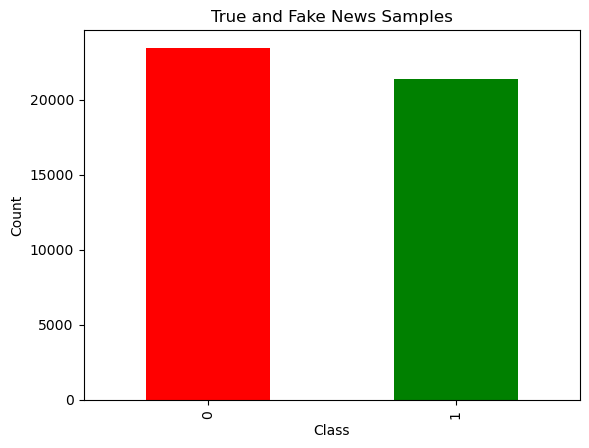

In [27]:
# Example list of colors
colors = ['red', 'green']  # Assign 'green' for true(1), 'red' for fake(0)

script['class'].value_counts().plot.bar(color=colors)

plt.xlabel('Class')
plt.ylabel('Count')
plt.title('True and Fake News Samples')
plt.show()


0 = fake and 1 = Real

# Preprocess Text

In [28]:
# Creating a function to convert the text in lowercase, remove the extra space, special chr., ulr and links.

import re
import string

def processWord(script):
    script = script.lower() # lower case 
    script = re.sub('\[.*?\]','', script) # remove anything with and within brackets
    script = re.sub('\\W',' ',script) # removes any character not a letter, digit, or underscore
    script= re.sub('https?://\S+|www\.\S+','',script) # removes any links starting with https
    script = re.sub('<.*?>+','', script) # removes anything with and within < >
    script = re.sub('[%s]' % re.escape(string.punctuation), '', script) # removes any string with % in it 
    script = re.sub('\n','',script) # remove next lines
    script = re.sub('\w*\d\w*','', script) # removes any string that contains atleast a digit with zero or more characters
    return script

<>:8: SyntaxWarning: invalid escape sequence '\['
<>:10: SyntaxWarning: invalid escape sequence '\S'
<>:14: SyntaxWarning: invalid escape sequence '\w'
<>:8: SyntaxWarning: invalid escape sequence '\['
<>:10: SyntaxWarning: invalid escape sequence '\S'
<>:14: SyntaxWarning: invalid escape sequence '\w'
C:\Users\loonl\AppData\Local\Temp\ipykernel_8312\2038320969.py:8: SyntaxWarning: invalid escape sequence '\['
  script = re.sub('\[.*?\]','', script) # remove anything with and within brackets
C:\Users\loonl\AppData\Local\Temp\ipykernel_8312\2038320969.py:10: SyntaxWarning: invalid escape sequence '\S'
  script= re.sub('https?://\S+|www\.\S+','',script) # removes any links starting with https
C:\Users\loonl\AppData\Local\Temp\ipykernel_8312\2038320969.py:14: SyntaxWarning: invalid escape sequence '\w'
  script = re.sub('\w*\d\w*','', script) # removes any string that contains atleast a digit with zero or more characters


In [29]:
# apply the function to the text column
script['text'] = script['text'].apply(processWord)

In [30]:
# observing the updated text
script['text'][1]

'trump s latest accuser  summer zervos who was a contestant on  the apprentice   stood next to high profile lawyer and hillary delegate  gloria allred today and read a statement accusing trump of inappropriate sexual behavior  tonight  trump responds by telling voters zervos emailed him only  months ago asking for help  here is trump s response to the this and other false accusations that have mysteriously been levied against him all at once  only  weeks before the election  and in the midst of the release of wikileaks  emails that expose some of the most damning information about crooked hillary to date  trump also makes a promise to his supporters that he will now stay on track and to stop allowing the left to distract him and the voters from issues that are truly important to us '

In [31]:
# our predictor variable
X = script['text']

# our target variable
y = script['class']

In [32]:
# train test split the data
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 42)

In [33]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import cross_val_score

# TF (Term Frequency): How frequently a word occurs in a document.
# IDF (Inverse Document Frequency): Measures how important a word is in relation to the entire corpus of documents.
# Words that appear in many documents are considered less informative.

# instantiate TfidfVectorizer
vc = TfidfVectorizer(max_df=0.7)
# max_df = that words appearing in more than 70% of the documents should be ignored.

# fit transform our document (X_train)
# x_train_cv
tfidf_train = vc.fit_transform(X_train) 

# transform our X_test 
# note we dont have to fit the testing set
# X_test_cv
tfidf_test = vc.transform(X_test)

In [34]:
print(tfidf_train)

  (0, 3479)	0.025192982671455432
  (0, 24518)	0.034997693878457664
  (0, 17565)	0.02162636678226794
  (0, 81701)	0.035602116156321875
  (0, 67647)	0.06988044206881547
  (0, 7298)	0.021443232449446386
  (0, 10613)	0.03609407087430571
  (0, 4989)	0.049796583395292277
  (0, 65164)	0.05710837374465789
  (0, 26394)	0.04341334037308042
  (0, 51717)	0.030096601106811054
  (0, 89492)	0.013744462054561668
  (0, 88052)	0.049343168085774436
  (0, 25774)	0.06884858855220927
  (0, 13091)	0.035823436894458514
  (0, 89139)	0.03760763879417312
  (0, 56561)	0.030921098422561816
  (0, 741)	0.031136144535674794
  (0, 72576)	0.02479494829322127
  (0, 7975)	0.023961922382895583
  (0, 17103)	0.055985729345876346
  (0, 78379)	0.048103633383866196
  (0, 81549)	0.01793853010051407
  (0, 19090)	0.05838781182123916
  (0, 347)	0.015233573367838855
  :	:
  (31413, 76162)	0.04727146904231569
  (31413, 51859)	0.09882119334186759
  (31413, 40342)	0.08460277271636106
  (31413, 1402)	0.03960109856212382
  (31413, 82523

In [35]:
print(tfidf_test)

  (0, 89324)	0.1169232232472109
  (0, 77485)	0.10044875152993873
  (0, 77256)	0.17275785047052253
  (0, 76410)	0.16951495212605924
  (0, 73669)	0.11184416050214704
  (0, 72538)	0.1407668760836796
  (0, 67932)	0.2729570215071557
  (0, 66332)	0.16095843667823845
  (0, 63455)	0.2222899968351341
  (0, 62368)	0.15453010914448648
  (0, 59888)	0.4837931769440601
  (0, 59845)	0.24640601842164814
  (0, 58900)	0.09220076470341962
  (0, 58018)	0.1066459572658772
  (0, 53231)	0.08347280667550032
  (0, 39495)	0.30423385531871483
  (0, 35942)	0.13161308251824713
  (0, 35560)	0.22931892767184903
  (0, 34760)	0.06551218705966043
  (0, 31949)	0.16027637232060743
  (0, 29593)	0.11585498660290751
  (0, 14973)	0.13207407254338627
  (0, 11901)	0.09648519458571664
  (0, 9885)	0.396725991640791
  (1, 91358)	0.019271726339794435
  :	:
  (13463, 2119)	0.02118111592596737
  (13463, 1914)	0.031188855857574416
  (13463, 1718)	0.015694066743458353
  (13463, 1463)	0.01945652246995301
  (13463, 1460)	0.0212544129005

# Logistic Regressiom

In [36]:
# import Logistic Regression
from sklearn.linear_model import LogisticRegression

# Instantiate Logistic Regression Model 
lr = LogisticRegression(random_state = 0)

# fit our model with the outputed tfidf training set
lr.fit(tfidf_train, y_train)

# predict the class on the tfidf testing set
pred_lr = lr.predict(tfidf_test)

# print the predictions
print(pred_lr) 

[0 1 1 ... 1 0 0]


In [37]:
# check the accuracy score on the testing set
import sklearn.metrics
accuracy1 = lr.score(tfidf_test, y_test)
print("Accuracy of Logistic Regression model:", accuracy1)

Accuracy of Logistic Regression model: 0.9846256684491979


In [38]:
# classification report 
from sklearn.metrics import classification_report
print(classification_report(pred_lr,y_test))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      7091
           1       0.98      0.98      0.98      6373

    accuracy                           0.98     13464
   macro avg       0.98      0.98      0.98     13464
weighted avg       0.98      0.98      0.98     13464



In [39]:
from sklearn.metrics import confusion_matrix  
cm1 = confusion_matrix(y_test,pred_lr)  
cm1

array([[6994,  110],
       [  97, 6263]], dtype=int64)

Accuracy: 0.985
Precision: 0.983
Recall: 0.985
F1 Score: 0.984


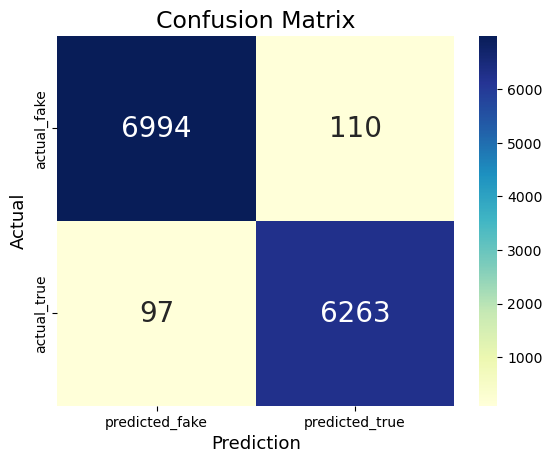

In [40]:
import seaborn as sns

cm = confusion_matrix(y_test, pred_lr)  
sns.heatmap(cm, xticklabels=['predicted_fake', 'predicted_true'], 
                yticklabels=['actual_fake', 'actual_true'],
annot=True, fmt='d', annot_kws={'fontsize':20}, cmap="YlGnBu");

plt.ylabel('Actual',fontsize=13)
plt.xlabel('Prediction',fontsize=13)
plt.title('Confusion Matrix',fontsize=17) 


true_neg, false_pos = cm[0]
false_neg, true_pos = cm[1]

accuracy = round((true_pos + true_neg) / (true_pos + true_neg + false_pos + false_neg),3)
precision = round((true_pos) / (true_pos + false_pos),3)
recall = round((true_pos) / (true_pos + false_neg),3)
f1 = round(2 * (precision * recall) / (precision + recall),3)

print('Accuracy: {}'.format(accuracy))
print('Precision: {}'.format(precision))
print('Recall: {}'.format(recall))
print('F1 Score: {}'.format(f1))

# Naive Bayes

In [41]:
# Use a Naive Bayes model
from sklearn.naive_bayes import MultinomialNB
import numpy as np

nb = MultinomialNB(alpha=0.3,fit_prior=False)

# Train the model
nb.fit(tfidf_train, y_train)

# Take the model that was trained on the X_train_cv data and apply it to the X_test_cv
pred_nb = nb.predict(tfidf_test)

print(pred_nb)

[0 1 1 ... 1 0 0]


In [42]:
# check the accuracy score on the testing set
import sklearn.metrics
accuracy2 = nb.score(tfidf_test, y_test)
print("Accuracy of Naive Bayes model:", accuracy2)

Accuracy of Naive Bayes model: 0.9361259655377302


In [43]:
# classification report 
from sklearn.metrics import classification_report
print(classification_report(pred_nb,y_test))

              precision    recall  f1-score   support

           0       0.95      0.93      0.94      7186
           1       0.93      0.94      0.93      6278

    accuracy                           0.94     13464
   macro avg       0.94      0.94      0.94     13464
weighted avg       0.94      0.94      0.94     13464



In [44]:
from sklearn.metrics import confusion_matrix  
cm2 = confusion_matrix(y_test,pred_nb)  
cm2

array([[6715,  389],
       [ 471, 5889]], dtype=int64)

Accuracy: 0.936
Precision: 0.938
Recall: 0.926
F1 Score: 0.932


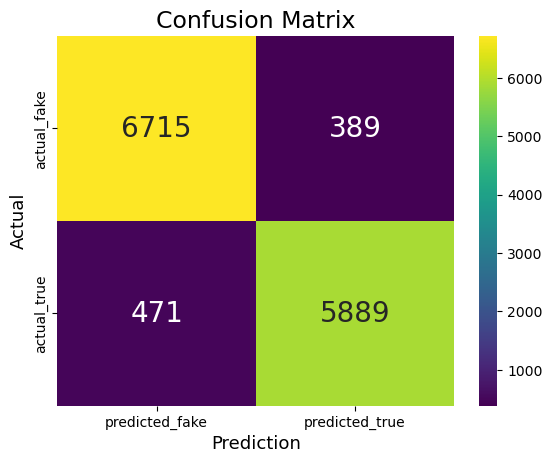

In [45]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, pred_nb) 
sns.heatmap(cm, xticklabels=['predicted_fake', 'predicted_true'], 
                yticklabels=['actual_fake', 'actual_true'],
annot=True, fmt='d', annot_kws={'fontsize':20}, cmap="viridis");

plt.ylabel('Actual',fontsize=13)
plt.xlabel('Prediction',fontsize=13)
plt.title('Confusion Matrix',fontsize=17) 


true_neg, false_pos = cm[0]
false_neg, true_pos = cm[1]

accuracy = round((true_pos + true_neg) / (true_pos + true_neg + false_pos + false_neg),3)
precision = round((true_pos) / (true_pos + false_pos),3)
recall = round((true_pos) / (true_pos + false_neg),3)
f1 = round(2 * (precision * recall) / (precision + recall),3)

print('Accuracy: {}'.format(accuracy))
print('Precision: {}'.format(precision))
print('Recall: {}'.format(recall))
print('F1 Score: {}'.format(f1))

#  Random Forest Classifier

In [46]:
# import Random Forest Classifier from sklearn 
from sklearn.ensemble import RandomForestClassifier

# instantiate our model 
rf = RandomForestClassifier(random_state = 0, n_estimators=50) 
# n_estimators: the number of decision trees in the forest. Increasing this hyperparameter generally improves the performance of the model 
# but also increases the computational cost of training and predicting

# train our model on training data
rf.fit(tfidf_train,y_train)

# get predictions using random forest classifier
pred_rf = rf.predict(tfidf_test)
print(pred_rf)

[0 1 1 ... 1 0 0]


In [47]:
# check the accuracy score on the testing set
import sklearn.metrics
accuracy3 = rf.score(tfidf_test, y_test)
print("Accuracy of Random Forest Classifier model:", accuracy3)

Accuracy of Random Forest Classifier model: 0.9856654783125371


In [48]:
from sklearn.metrics import confusion_matrix  
cm3 = confusion_matrix(y_test,pred_rf)  
cm3

array([[7031,   73],
       [ 120, 6240]], dtype=int64)

Accuracy: 0.986
Precision: 0.988
Recall: 0.981
F1 Score: 0.984


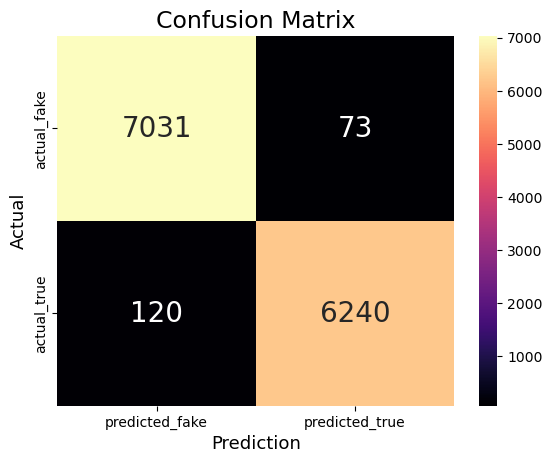

In [49]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, pred_rf) 
sns.heatmap(cm, xticklabels=['predicted_fake', 'predicted_true'], 
                yticklabels=['actual_fake', 'actual_true'],
annot=True, fmt='d', annot_kws={'fontsize':20}, cmap="magma");

plt.ylabel('Actual',fontsize=13)
plt.xlabel('Prediction',fontsize=13)
plt.title('Confusion Matrix',fontsize=17) 


true_neg, false_pos = cm[0]
false_neg, true_pos = cm[1]

accuracy = round((true_pos + true_neg) / (true_pos + true_neg + false_pos + false_neg),3)
precision = round((true_pos) / (true_pos + false_pos),3)
recall = round((true_pos) / (true_pos + false_neg),3)
f1 = round(2 * (precision * recall) / (precision + recall),3)

print('Accuracy: {}'.format(accuracy))
print('Precision: {}'.format(precision))
print('Recall: {}'.format(recall))
print('F1 Score: {}'.format(f1))

# Compare Models

In [50]:
#creating accuracy dataframe
accuaracy_list=pd.DataFrame({'Models':['Logistic Regression','Naive Bayes','Random Forest'],
                            'Accuracy':[accuracy1*100,accuracy2*100,
                                        accuracy3*100]})

In [51]:
print(accuaracy_list)


                Models   Accuracy
0  Logistic Regression  98.462567
1          Naive Bayes  93.612597
2        Random Forest  98.566548


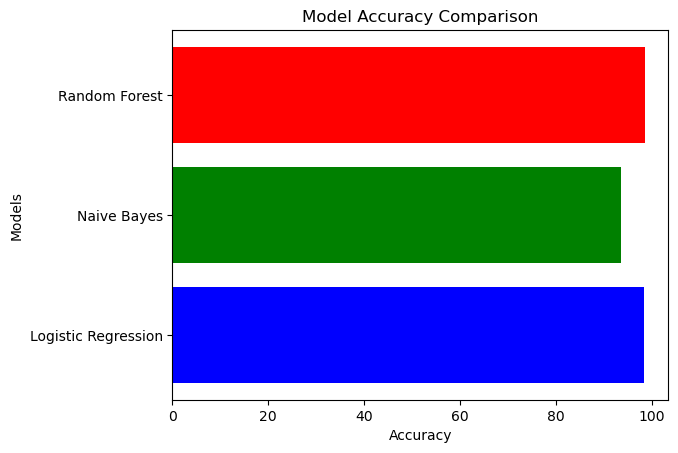

In [52]:
# Example list of colors
colors = ['blue', 'green', 'red', 'purple', 'orange']

# Plot with different colors for each bar
plt.barh(accuaracy_list['Models'], accuaracy_list['Accuracy'], color=colors)

plt.xlabel('Accuracy')
plt.ylabel('Models')
plt.title('Model Accuracy Comparison')
plt.show()


In [111]:
import joblib
joblib.dump(vc, 'tfidfVectorizer.joblib')

['tfidfVectorizer.joblib']

In [112]:
joblib.dump(lr, 'logistic_regression_model.joblib')

['logistic_regression_model.joblib']

# Manual Testing

In [2]:
# function to to check the predicted class and return a string whether its a fake or true news
def output_label(n):
    if n==0:
        return "Fake News"
    elif n==1:
        return "Real News"

# functions that gets a input of news(text) and does the same steps as above
# we get the news and put into a dataframe 
# we get the news text and clean it 
# we get the clean text and tfidf the text
# predict the news using the models we used
def manual_test(news):
    testing_news = {"text":[news]}
    new_def_test = pd.DataFrame(testing_news)
    new_def_test['text'] = new_def_test['text'].apply(processWord)
    new_x_test = new_def_test['text']
    new_tfidf_test = vc.transform(new_x_test)
    pred_lr = lr.predict(new_tfidf_test)
    pred_nb = nb.predict(new_tfidf_test)
    pred_rf = rf.predict(new_tfidf_test)
    
    return print("\n\n Logistic Regression Prediction: {} \n Naive Bayes Prediction: {} \n Random Forest Prediction: {}".format(
        output_label(pred_lr[0]), 
        output_label(pred_nb[0]), 
        output_label(pred_rf[0])))        

In [3]:
# observe an example of fake news that we reserved in the beginning
fakeData_manual_testing['text'].values[2]

NameError: name 'fakeData_manual_testing' is not defined

In [4]:
# observe an example of true news that we reserved in the beginning
trueData_manual_testing['text'].values[3]

NameError: name 'trueData_manual_testing' is not defined

In [5]:
# make the user put an input of news 
news = str(input())
# gets the users input and checks if the news is fake or real
manual_test(news)

KeyboardInterrupt: Interrupted by user